# Logistic Regression


We are trying to decide between whether an object belongs to one of two categories:  $C_0$ and $C_1$.  In terms of probability, we frame this as the likelihood that something belongs to $C_1$ as:

$$ y = P(C_1 | x)$$

which is the conditional probability of $C_1$ given some $x$.  Because we are talking about a binary situation, we know:

$$ P(C_1 | x) + P(C_0 | X) = 1$$

$$ y + P(C_0 | X) = 1$$

$$ 1 - y = P(C_0 | X)$$

**Probability and Odds**

If we consider the odds of a binary event, we are really talking about 

$$\frac{p}{1 - p}$$

Recognizing this expression as having the same structure as the transformation that linearizes a set of data having an s-shaped curve, (i.e. $\frac{y}{1-y}$) we connect the idea of odds and that the logistic function is in fact giving us the **log odds** for some value $x$.  Hence, we have:

$$\ln(\frac{y}{1-y}) = \text{logit}(y)$$

and if we solve for $y$ we have:

$$y = \frac{1}{1 + e^{-(ax + b)}}$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Example

Heights of Boys against Girls.

In [4]:
b = np.random.normal(149.05, 3.75, 800)
g = np.random.normal(151.19, 3.75, 700)

(array([  9.,  41.,  77., 184., 152., 144.,  72.,  18.,   1.,   2.]),
 array([139.73749715, 142.36708431, 144.99667147, 147.62625863,
        150.25584578, 152.88543294, 155.5150201 , 158.14460726,
        160.77419441, 163.40378157, 166.03336873]),
 <a list of 10 Patch objects>)

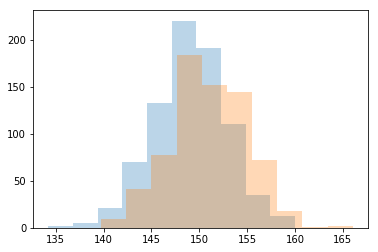

In [5]:
plt.hist(b, alpha = 0.3)
plt.hist(g, alpha = 0.3)

In [6]:
b = [[x, 0] for x in b]
g = [[x, 1] for x in g]

In [7]:
bg = np.array(b + g)

In [8]:
bg

array([[153.19233603,   0.        ],
       [149.54052958,   0.        ],
       [147.22727194,   0.        ],
       ...,
       [144.32050957,   1.        ],
       [143.74310572,   1.        ],
       [148.45689895,   1.        ]])

In [9]:
bg[:, 0]

array([153.19233603, 149.54052958, 147.22727194, ..., 144.32050957,
       143.74310572, 148.45689895])

In [10]:
bg[:, 1]

array([0., 0., 0., ..., 1., 1., 1.])

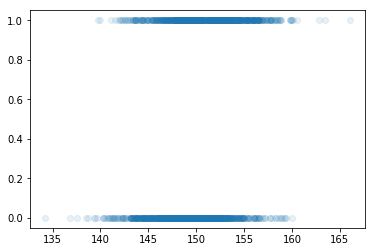

In [11]:
x = bg[:, 0]
y = bg[:, 1]
plt.plot(x, y, 'o', alpha = 0.1)

In [12]:
boy_girl = pd.DataFrame(bg, columns= ['heights', 'gender'])

In [13]:
boy_girl.head()

,heights,gender
0,153.192336,0.0
1,149.540530,0.0
2,147.227272,0.0
3,149.109085,0.0
4,148.186602,0.0


In [14]:
girls = boy_girl[boy_girl['gender'] == 1]

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
X = boy_girl['heights'].values.reshape(-1,1)
y = boy_girl['gender']
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
lr.score(X, y)

0.5813333333333334

In [18]:
lr.coef_[0][0]

0.02509752829556363

In [19]:
lr.intercept_[0]

-3.8880647028924398

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
predictions = lr.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

        0.0       0.56      0.94      0.71       800
        1.0       0.72      0.17      0.27       700

avg / total       0.64      0.58      0.50      1500



In [22]:
confusion_matrix(y, predictions)

array([[754,  46],
       [582, 118]])

  | $ $ | $C_0$ | $C_1$ |
  | ----- | ----- | ----- |
  | $C_0$|  |  |
  | $C_1$|  |  |
  
  **Precision**: Proportion of values from thos predicted to be in $C_1$ correctly.
  
  $$\frac{TP}{TP + FP}$$
  
  **Recall**: Proportion of values that are actually in $C_1$ predicted correctly.
  
  $$\frac{TP}{TP + FN}$$
  
  Ideally, we'd like this to be as high as possible in each regard.  We can understand the relationship between Precision and Recall through their harmonic mean -- the F1 score.
  
  **F1**: Harmonic mean of Precision and Recall
  
  $$\frac{2PR}{P + R}$$

In [23]:
from sklearn import datasets

In [24]:
iris = datasets.load_iris()

In [25]:
X = iris['data'][:, 3:]#petalwidth
y = (iris['target'] == 2).astype(np.int)

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
lgr = LogisticRegression()
lgr.fit(X,y)
predictions= lgr.predict(X)

In [28]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
prb_predict= lgr.predict_proba(X)
prb_predict

array([[0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.96880341, 0.03119659],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.98127896, 0.01872104],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.98127896, 0.01872104],
       [0.98127896, 0.01872104],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.95984502, 0.04015498],
       [0.96880341, 0.03119659],
       [0.96880341, 0.03119659],
       [0.96880341, 0.03119659],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.97581359, 0.02418641],
       [0.94845101, 0.05154899],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.

In [30]:
probs = pd.DataFrame(prb_predict, columns=['0', '1'])

In [31]:
probs.head()

,0,1
0,0.975814,0.024186
1,0.975814,0.024186
2,0.975814,0.024186
3,0.975814,0.024186
4,0.975814,0.024186


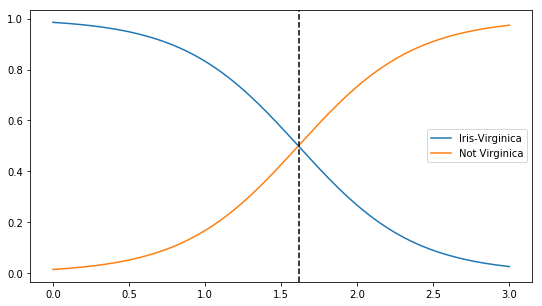

In [32]:
plt.figure(figsize = (9, 5))
x = np.linspace(0, 3, 150).reshape(-1,1)
y_probs= lgr.predict_proba(x)
plt.plot(x, y_probs[:, 0], label= 'Iris-Virginica')
plt.plot(x,y_probs[:,1], label= 'Not Virginica')
plt.legend()
plt.axvline(x = 1.62, color= 'black',linestyle = '--')

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import cross_val_predict, cross_val_score

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
precision_score(y, predictions)

0.9583333333333334

In [40]:
recall_score(y, predictions)

0.92

In [41]:
f1_score(y, predictions)

0.9387755102040817

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
pipe = make_pipeline(PolynomialFeatures(), LogisticRegression())

In [46]:
params = {'polynomialfeatures__degree': [i for i in range(1, 5)],
         'logisticregression__C': [0.1, 1, 5, 10, 100]}

In [47]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [48]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4], 'logisticregression__C': [0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [53]:
best = grid.best_estimator_

In [54]:
best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [55]:
pred = best.predict(X_test)

In [56]:
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        19
          1       0.95      1.00      0.97        19

avg / total       0.97      0.97      0.97        38

